<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/%E7%AC%AC%E5%9B%9B%E7%AB%A0%EF%BC%9A%E5%BD%A2%E6%85%8B%E7%B4%A0%E8%A7%A3%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os

path = os.getcwd()

print(path)

try:
    os.chdir("/content/drive/My Drive/言語処理100本ノック")
except:
    pass

os.getcwd()

/content


'/content/drive/My Drive/言語処理100本ノック'

In [3]:
#!wget https://nlp100.github.io/data/neko.txt Data/

In [4]:
#!apt install mecab libmecab-dev mecab-ipadic-utf8

In [5]:
#!mecab -o ./Data/neko.txt.mecab ./neko.txt

In [6]:
!wc -l ./Data/neko.txt.mecab

226266 ./Data/neko.txt.mecab


In [7]:
!head -15 ./Data/neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


#30.形態素解析結果の読み込み

In [8]:
filename = './Data/neko.txt.mecab'

sentences = []
morphs = []

with open(filename,mode='r') as f:
  for line in f:
    if line != 'EOS\n':
      fields = line.split('\t')
      if len(fields) != 2 or fields[0] == '':
        continue
      else:
        attr = fields[1].split(',')
        morph = {'surface':fields[0],'base':attr[6],'pos':attr[0],'pos1':attr[1]}
        morphs.append(morph)
    else:
      sentences.append(morphs)
      morphs = []

In [9]:
for morph in sentences[2]:
  print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


#31.動詞

In [ ]:
ans = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      ans.add(morph['surface'])

In [ ]:
len(ans)

3893

In [ ]:
for v in list(ans)[:10]:
  print(v)

翳す
溜ら
演ずる
纏める
下さい
飛ぶ
押し出す
とろ
唱う
嗅い


#32.動詞の原形

In [ ]:
ans = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      ans.add(morph['base'])

In [ ]:
for v in list(ans)[:10]:
  print(v)

晴れる
翳す
纏める
演ずる
踊る
あたう
叶う
称える
飛ぶ
押し出す


#33.「AのB」

二つの名詞が「の」で連結されている名詞句

In [ ]:
ans = set()
for sentence in sentences:
  for i in range(1,len(sentence)-1):
    if sentence[i-1]['pos']=='名詞' and sentence[i]['surface']=='の' and sentence[i+1]['pos']=='名詞':
      ans.add(sentence[i-1]['surface'] + sentence[i]['surface'] + sentence[i+1]['surface']
      )


In [ ]:
for v in list(ans)[:10]:
  print(v)

彼の心
未来の武
ヴァイオリンの古物
暗黒の淵
君の特色
大勢の事
他の暗黒
煙草の持ち主
爪の先
冗談のよう


#34.名詞の連接

In [ ]:
ans = set()
for sentence in sentences:
  nouns = ''
  num = 0
  for morph in sentence:
    if morph['pos']=='名詞':
      nouns = ''.join([nouns,morph['surface']])
      num += 1
    elif num >=2:
      ans.add(nouns)
      nouns = ''
      num = 0
    else:
      nouns = ''
      num = 0
  if num >= 2:
    ans.add(nouns)

In [ ]:
# 確認
print(f'連接名詞の種類: {len(ans)}\n')
print('---サンプル---')
for n in list(ans)[:10]:
  print(n)

連接名詞の種類: 4457

---サンプル---
健胃
——浅草警察署
——なに君
適不適
それぎりなの
榊原健吉
一今
平生学校
一室内
主人苦沙弥先生


#35.単語の出現頻度

In [ ]:
from collections import defaultdict

In [ ]:
ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1
ans = sorted(ans.items(),key=lambda x: x[1], reverse=True)

for w in ans[:10]:
  print(w)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


In [ ]:
#!pip install japanize_matplotlib

<BarContainer object of 10 artists>

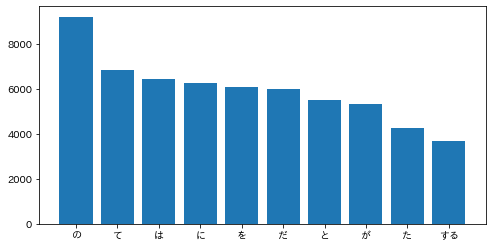

In [ ]:
import japanize_matplotlib
import matplotlib.pyplot as plt

ans = defaultdict(int)
for  sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1
ans_ = ans.values()
ans = sorted(ans.items(),key=lambda x:x[1],reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8,4))
plt.bar(keys,values)

Text(0, 0.5, '単語の種類数')

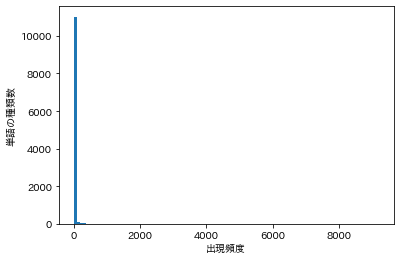

In [ ]:

plt.hist(ans_,bins=100)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')

#39.Zipfの法則

Text(0, 0.5, '出現頻度')

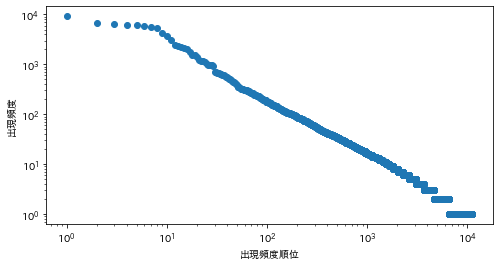

In [ ]:
ranks = [r+1 for r in range(len(ans))]
values = [a[1] for a in ans]
plt.figure(figsize=(8,4))
plt.scatter(ranks,values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')

In [ ]:
import random
import string

n = 100
val_str = ''.join([random.choice(string.ascii_lowercase) for i in range(n) ])
print(val_str)

In [ ]:
d = {}
print(type(d))

for key in val_str:
  if key not in d:
    d[key]=0
  d[key] += 1

In [ ]:
d

In [ ]:
from collections import defaultdict
d = defaultdict(int)

for key in val_str:
  d[key] += 1

print(d)

In [ ]:
a = {'apple': 3, 'lemon': 7, 'peach': 1}

b = a.keys()
c = a.values()

print(b)  # dict_keys(['apple', 'lemon', 'peach'])
print(c)  # dict_values([3, 7, 1])